# Imports


In [1]:
from utils.experiment import *
from utils.transforms import *
import utils.experiment as exp
import utils.transforms as tf
import importlib

importlib.reload(tf)
importlib.reload(exp)

<module 'utils.experiment' from 'd:\\Development\\wisemat-posture-classification\\utils\\experiment.py'>

# ✔️ Baseline

- Basic normalization
  - normalize values between 0 and 1 because images from the different datasets have different value ranges in the images
  - equalizeHist to have a unified brightness and contrast
  - normalize mean because it normalizes statistical properties of the images and is a recommended and often used step
  - same for standardization
- warum diese reihenfolge?


In [2]:
normalization = [
    Resize((32, 64)),
    Standardize(),
    NormalizeMinMax(),
    EqualizeHist(),
    Resize((64, 128)),
]

baseline = Experiment("Baseline", normalization + [ToTensor()])


# ✔️ No Preprocessing

In [3]:
no_preprocessing = Experiment("No Preprocessing", [Resize((64, 128)), ToTensor()])

# ✔️ CLAHE

In [4]:
clahe = Experiment(
    "CLAHE",
    [
        Resize((32, 64)),
        Standardize(),
        NormalizeMinMax(),
        CLAHE(),
        Resize((64, 128)),
        ToTensor(),
    ],
)

# ✔️ Agressive Thresholding
- One could also try out different thresholding algorithms, but there was no difference in my case, but maybe in combination with other preprocessing steps it might make a difference. skimage provides a function for plotting the results of the provided thresholding algorithms

In [5]:
agressive_thresholding = Experiment(
    "Agressive Thresholding",
    [
        *normalization,
        Blur((3, 3)),
        Threshold(lambda img: np.median(img[img > 0.0])),
        ToTensor(),
    ],
)


# ✔️ Agressive Thresholding + Sobel


In [6]:
sobel = Experiment(
    "Agressive Thresholding + Sobel",
    [
        *normalization,
        Blur((3, 3)),
        Threshold(lambda img: np.median(img[img > 0.0])),
        Sobel(),
        Threshold(lambda img: np.median(img[img > 0.0])),
        ToTensor(),
    ],
)


# ✔️ Rolling Ball + Agressive Thresholding


In [7]:
rolling_ball = Experiment("Rolling Ball + Agressive Thresholding",
    [
        *normalization,
        RollingBall(radius=5),
        Blur((3, 3)),
        Threshold(lambda img: np.median(img[img > 0.0])),
        ToTensor(),
    ]
)


# ✔️ Simple denoise
- comparison to agressive thresholding and rolling ball + thresholding which noise removal methods has the best result
- try different denoise functions?

In [8]:
simple_denoise = Experiment("Simple Denoise",
    [
        *normalization,
        Denoise(),
        Threshold(lambda img: np.median(img[img > 0.0])),
        ToTensor(),
    ]
)

# ✔️ Fourier


In [9]:
fourier = Experiment("Fourier",
    [
        *normalization,
        Denoise(),
        Blur((3, 3)),
        HighPass(rad=50),
        Blur((3, 3)),
        Threshold(lambda img: np.median(img[img > 0.0])),
        ToTensor(),
    ]
)


# ✔️ Improving SLP

- hier zwei szenarien testen: einmal diese transformation auf beide datensätze anwenden und einmal nur auf slp und agressive thresholding oder so auf physionet
- interessante sache: später resizen behält in den schritten davor noch mehr details, womit besser preprocessed werden kann
- Potential: Menschen auf slp bildern vergrößern, damit die auf allen druckbildern ungefähr gleich groß sind


In [10]:
improve_slp = Experiment("Improve SLP",
    [
        Standardize(),
        NormalizeMinMax(),
        EqualizeHist(),
        Blur((3, 3)),
        Denoise(),
        Threshold(lambda img: np.median(img[img > 0.0])),
        Close((3, 3), ktype=cv2.MORPH_CROSS, iterations=3),
        Blur((3, 3)),
        Resize((64, 128)),
        ToTensor(),
    ]
)


# ✔️ Radial Transform
- als preprocessing schritt mit center origin
- als data augmentation schritt mit random origin

In [11]:
radial_transform = Experiment("Radial Transform",
    [
        *normalization,
        Blur((3, 3)),
        Threshold(lambda img: np.median(img[img > 0.0])),
        WarpPolar(),
        ToTensor(),
    ]
)


# ✔️ Radial Transform on Sobel

In [12]:
radial_transform_sobel = Experiment("Radial Transform on Sobel",
    [
        *normalization,
        Blur((3, 3)),
        Threshold(lambda img: np.median(img[img > 0.0])),
        Sobel(),
        Threshold(lambda img: np.median(img[img > 0.0])),
        WarpPolar(),
        ToTensor(),
    ]
)


# ✔️ Dynamic Closing
-> Future Work: Look at each segment of the image instead of the whole image at once and do local dynamic closing

In [13]:
dynamic_closing = Experiment("Dynamic Closing",
    [
        *normalization,
        Blur((3, 3)),
        Threshold(lambda img: np.median(img[img > 0.0])),
        CloseInHoughDirection(),
        ToTensor(),
    ]
)

# ✔️ Individual Transform

In [14]:
individual_tranform = Experiment(
    "Individual Transform",
    transform=[ # Agressive Thresholding
        *normalization,
        Blur((3, 3)),
        Threshold(lambda img: np.median(img[img > 0.0])),
        ToTensor(),
    ],
    slp_transform=[ # Improve SLP
        Standardize(),
        NormalizeMinMax(),
        EqualizeHist(),
        Blur((3, 3)),
        Denoise(),
        Threshold(lambda img: np.median(img[img > 0.0])),
        Close((3, 3), ktype=cv2.MORPH_CROSS, iterations=3),
        Blur((3, 3)),
        Resize((64, 128)),
        ToTensor(),
    ],
)

# ✔️ Random Rotate

In [15]:
random_rotate = Experiment(
    "Random Rotate",
    [
        *normalization,
        Blur((3, 3)),
        Threshold(lambda img: np.median(img[img > 0.0])),
        RandomRotate(30),
        ToTensor(),
    ],
)

# ✔️ Random Rotate + Zoom

In [16]:
random_rotate_zoom = Experiment(
    "Random Rotate Zoom",
    [
        *normalization,
        Blur((3, 3)),
        Threshold(lambda img: np.median(img[img > 0.0])),
        RandomRotate(30),
        RandomZoom((128, 64)),
        ToTensor(),
    ],
)

# Evaluation

Running Experiment >>No Preprocessing<<
Reading data took 0.5s


Train progress: [                              ] 0/7370 Epoch: --- Loss: ------
Train progress: [                           ] 0/7370 Epoch: 1/10 Loss: ↘ 2.8408
Train progress: [                             ] 10/7370 Epoch: 1/10 Loss: ↗ nan
Train progress: [                            ] 100/7370 Epoch: 1/10 Loss: ↗ nan
Train progress: [                            ] 190/7370 Epoch: 1/10 Loss: ↗ nan
Train progress: [-                           ] 280/7370 Epoch: 1/10 Loss: ↗ nan
Train progress: [-                           ] 380/7370 Epoch: 1/10 Loss: ↗ nan
Train progress: [-                           ] 470/7370 Epoch: 1/10 Loss: ↗ nan
Train progress: [--                          ] 560/7370 Epoch: 1/10 Loss: ↗ nan
Train progress: [--                          ] 660/7370 Epoch: 1/10 Loss: ↗ nan
Train progress: [--                          ] 737/7370 Epoch: 2/10 Loss: ↗ nan
Train progress: [--                          ] 747/7370 Epoch: 2/10 Loss: ↗ nan
Train progress: [---                    

1. Training took 24m 16.9s
1. Evaluation took 6.5s


Train progress: [                              ] 0/7370 Epoch: --- Loss: ------
Train progress: [                           ] 0/7370 Epoch: 1/10 Loss: ↘ 2.0491
Train progress: [                          ] 10/7370 Epoch: 1/10 Loss: ↘ 1.0636
Train progress: [                          ] 20/7370 Epoch: 1/10 Loss: ↘ 0.7075
Train progress: [                          ] 30/7370 Epoch: 1/10 Loss: ↗ 0.8401
Train progress: [                          ] 40/7370 Epoch: 1/10 Loss: ↘ 0.7775
Train progress: [                          ] 50/7370 Epoch: 1/10 Loss: ↗ 0.8081
Train progress: [                          ] 60/7370 Epoch: 1/10 Loss: ↗ 2.4171
Train progress: [                          ] 70/7370 Epoch: 1/10 Loss: ↘ 0.9414
Train progress: [                          ] 80/7370 Epoch: 1/10 Loss: ↘ 0.6628
Train progress: [                          ] 90/7370 Epoch: 1/10 Loss: ↘ 0.6089
Train progress: [                         ] 100/7370 Epoch: 1/10 Loss: ↘ 0.5600
Train progress: [                       

2. Training took 24m 25.1s
2. Evaluation took 6.4s


Train progress: [                              ] 0/7370 Epoch: --- Loss: ------
Train progress: [                           ] 0/7370 Epoch: 1/10 Loss: ↘ 2.5356
Train progress: [                             ] 10/7370 Epoch: 1/10 Loss: ↗ nan
Train progress: [                            ] 100/7370 Epoch: 1/10 Loss: ↗ nan
Train progress: [                            ] 190/7370 Epoch: 1/10 Loss: ↗ nan
Train progress: [-                           ] 280/7370 Epoch: 1/10 Loss: ↗ nan
Train progress: [-                           ] 380/7370 Epoch: 1/10 Loss: ↗ nan
Train progress: [-                           ] 470/7370 Epoch: 1/10 Loss: ↗ nan
Train progress: [--                          ] 560/7370 Epoch: 1/10 Loss: ↗ nan
Train progress: [--                          ] 660/7370 Epoch: 1/10 Loss: ↗ nan
Train progress: [--                          ] 737/7370 Epoch: 2/10 Loss: ↗ nan
Train progress: [--                          ] 747/7370 Epoch: 2/10 Loss: ↗ nan
Train progress: [---                    

3. Training took 21m 38.5s


Train progress: [                              ] 0/7370 Epoch: --- Loss: ------


3. Evaluation took 5.4s


Train progress: [                           ] 0/7370 Epoch: 1/10 Loss: ↘ 2.1428
Train progress: [                             ] 10/7370 Epoch: 1/10 Loss: ↗ nan
Train progress: [                            ] 100/7370 Epoch: 1/10 Loss: ↗ nan
Train progress: [                            ] 190/7370 Epoch: 1/10 Loss: ↗ nan
Train progress: [-                           ] 280/7370 Epoch: 1/10 Loss: ↗ nan
Train progress: [-                           ] 380/7370 Epoch: 1/10 Loss: ↗ nan
Train progress: [-                           ] 470/7370 Epoch: 1/10 Loss: ↗ nan
Train progress: [--                          ] 560/7370 Epoch: 1/10 Loss: ↗ nan
Train progress: [--                          ] 660/7370 Epoch: 1/10 Loss: ↗ nan
Train progress: [--                          ] 737/7370 Epoch: 2/10 Loss: ↗ nan
Train progress: [--                          ] 747/7370 Epoch: 2/10 Loss: ↗ nan
Train progress: [---                         ] 847/7370 Epoch: 2/10 Loss: ↗ nan
Train progress: [---                    

4. Training took 20m 30.2s


Train progress: [                              ] 0/7370 Epoch: --- Loss: ------


4. Evaluation took 5.5s


Train progress: [                           ] 0/7370 Epoch: 1/10 Loss: ↘ 3.2436
Train progress: [                             ] 10/7370 Epoch: 1/10 Loss: ↗ nan
Train progress: [                            ] 100/7370 Epoch: 1/10 Loss: ↗ nan
Train progress: [                            ] 190/7370 Epoch: 1/10 Loss: ↗ nan
Train progress: [-                           ] 280/7370 Epoch: 1/10 Loss: ↗ nan
Train progress: [-                           ] 380/7370 Epoch: 1/10 Loss: ↗ nan
Train progress: [-                           ] 470/7370 Epoch: 1/10 Loss: ↗ nan
Train progress: [--                          ] 560/7370 Epoch: 1/10 Loss: ↗ nan
Train progress: [--                          ] 660/7370 Epoch: 1/10 Loss: ↗ nan
Train progress: [--                          ] 737/7370 Epoch: 2/10 Loss: ↗ nan
Train progress: [--                          ] 747/7370 Epoch: 2/10 Loss: ↗ nan
Train progress: [---                         ] 847/7370 Epoch: 2/10 Loss: ↗ nan
Train progress: [---                    

5. Training took 20m 30.6s
5. Evaluation took 5.6s
Successfully ran Experiment >>No Preprocessing<<
Running Experiment >>CLAHE<<
Reading data took 0.6s


Train progress: [                              ] 0/7370 Epoch: --- Loss: ------
Train progress: [                           ] 0/7370 Epoch: 1/10 Loss: ↘ 1.0956
Train progress: [                          ] 10/7370 Epoch: 1/10 Loss: ↘ 1.0924
Train progress: [                          ] 20/7370 Epoch: 1/10 Loss: ↘ 1.0699
Train progress: [                          ] 30/7370 Epoch: 1/10 Loss: ↘ 1.0584
Train progress: [                          ] 40/7370 Epoch: 1/10 Loss: ↘ 1.0505
Train progress: [                          ] 50/7370 Epoch: 1/10 Loss: ↗ 1.1037
Train progress: [                          ] 60/7370 Epoch: 1/10 Loss: ↘ 1.0486
Train progress: [                          ] 70/7370 Epoch: 1/10 Loss: ↗ 1.1146
Train progress: [                          ] 80/7370 Epoch: 1/10 Loss: ↘ 1.0703
Train progress: [                          ] 90/7370 Epoch: 1/10 Loss: ↘ 1.0431
Train progress: [                         ] 100/7370 Epoch: 1/10 Loss: ↘ 1.0416
Train progress: [                       

1. Training took 21m 43.0s


Train progress: [                              ] 0/7370 Epoch: --- Loss: ------


1. Evaluation took 6.3s


Train progress: [                           ] 0/7370 Epoch: 1/10 Loss: ↘ 1.0962
Train progress: [                          ] 10/7370 Epoch: 1/10 Loss: ↘ 1.0899
Train progress: [                          ] 20/7370 Epoch: 1/10 Loss: ↘ 1.0796
Train progress: [                          ] 30/7370 Epoch: 1/10 Loss: ↗ 1.0802
Train progress: [                          ] 40/7370 Epoch: 1/10 Loss: ↗ 1.0841
Train progress: [                          ] 50/7370 Epoch: 1/10 Loss: ↘ 1.0818
Train progress: [                          ] 60/7370 Epoch: 1/10 Loss: ↗ 1.1435
Train progress: [                          ] 70/7370 Epoch: 1/10 Loss: ↘ 1.1229
Train progress: [                          ] 80/7370 Epoch: 1/10 Loss: ↘ 1.0897
Train progress: [                          ] 90/7370 Epoch: 1/10 Loss: ↘ 0.9838
Train progress: [                         ] 100/7370 Epoch: 1/10 Loss: ↗ 1.0198
Train progress: [                         ] 110/7370 Epoch: 1/10 Loss: ↗ 1.0658
Train progress: [                       

2. Training took 21m 36.4s


Train progress: [                              ] 0/7370 Epoch: --- Loss: ------


2. Evaluation took 6.4s


Train progress: [                           ] 0/7370 Epoch: 1/10 Loss: ↘ 1.1019
Train progress: [                          ] 10/7370 Epoch: 1/10 Loss: ↗ 1.1029
Train progress: [                          ] 20/7370 Epoch: 1/10 Loss: ↘ 1.0943
Train progress: [                          ] 30/7370 Epoch: 1/10 Loss: ↘ 1.0912
Train progress: [                          ] 40/7370 Epoch: 1/10 Loss: ↘ 1.0659
Train progress: [                          ] 50/7370 Epoch: 1/10 Loss: ↗ 1.0744
Train progress: [                          ] 60/7370 Epoch: 1/10 Loss: ↗ 1.0748
Train progress: [                          ] 70/7370 Epoch: 1/10 Loss: ↘ 1.0184
Train progress: [                          ] 80/7370 Epoch: 1/10 Loss: ↗ 1.1108
Train progress: [                          ] 90/7370 Epoch: 1/10 Loss: ↘ 1.1048
Train progress: [                         ] 100/7370 Epoch: 1/10 Loss: ↘ 1.0500
Train progress: [                         ] 110/7370 Epoch: 1/10 Loss: ↗ 1.0747
Train progress: [                       

3. Training took 21m 39.7s


Train progress: [                              ] 0/7370 Epoch: --- Loss: ------
Train progress: [                           ] 0/7370 Epoch: 1/10 Loss: ↘ 1.0979


3. Evaluation took 6.4s


Train progress: [                          ] 10/7370 Epoch: 1/10 Loss: ↘ 1.0918
Train progress: [                          ] 20/7370 Epoch: 1/10 Loss: ↘ 1.0688
Train progress: [                          ] 30/7370 Epoch: 1/10 Loss: ↗ 1.1294
Train progress: [                          ] 40/7370 Epoch: 1/10 Loss: ↘ 1.0497
Train progress: [                          ] 50/7370 Epoch: 1/10 Loss: ↘ 1.0371
Train progress: [                          ] 60/7370 Epoch: 1/10 Loss: ↗ 1.0435
Train progress: [                          ] 70/7370 Epoch: 1/10 Loss: ↘ 1.0256
Train progress: [                          ] 80/7370 Epoch: 1/10 Loss: ↗ 1.0518
Train progress: [                          ] 90/7370 Epoch: 1/10 Loss: ↗ 1.0668
Train progress: [                         ] 100/7370 Epoch: 1/10 Loss: ↘ 1.0536
Train progress: [                         ] 110/7370 Epoch: 1/10 Loss: ↘ 1.0372
Train progress: [                         ] 120/7370 Epoch: 1/10 Loss: ↗ 1.0891
Train progress: [                       

4. Training took 21m 35.9s


Train progress: [                              ] 0/7370 Epoch: --- Loss: ------
Train progress: [                           ] 0/7370 Epoch: 1/10 Loss: ↘ 1.0987


4. Evaluation took 6.4s


Train progress: [                          ] 10/7370 Epoch: 1/10 Loss: ↘ 1.0920
Train progress: [                          ] 20/7370 Epoch: 1/10 Loss: ↘ 1.0880
Train progress: [                          ] 30/7370 Epoch: 1/10 Loss: ↗ 1.1049
Train progress: [                          ] 40/7370 Epoch: 1/10 Loss: ↘ 1.0808
Train progress: [                          ] 50/7370 Epoch: 1/10 Loss: ↘ 1.0635
Train progress: [                          ] 60/7370 Epoch: 1/10 Loss: ↗ 1.0770
Train progress: [                          ] 70/7370 Epoch: 1/10 Loss: ↗ 1.1052
Train progress: [                          ] 80/7370 Epoch: 1/10 Loss: ↗ 1.1263
Train progress: [                          ] 90/7370 Epoch: 1/10 Loss: ↘ 1.0503
Train progress: [                         ] 100/7370 Epoch: 1/10 Loss: ↗ 1.0945
Train progress: [                         ] 110/7370 Epoch: 1/10 Loss: ↘ 1.0607
Train progress: [                         ] 120/7370 Epoch: 1/10 Loss: ↗ 1.1327
Train progress: [                       

5. Training took 21m 28.9s
5. Evaluation took 6.3s
Successfully ran Experiment >>CLAHE<<


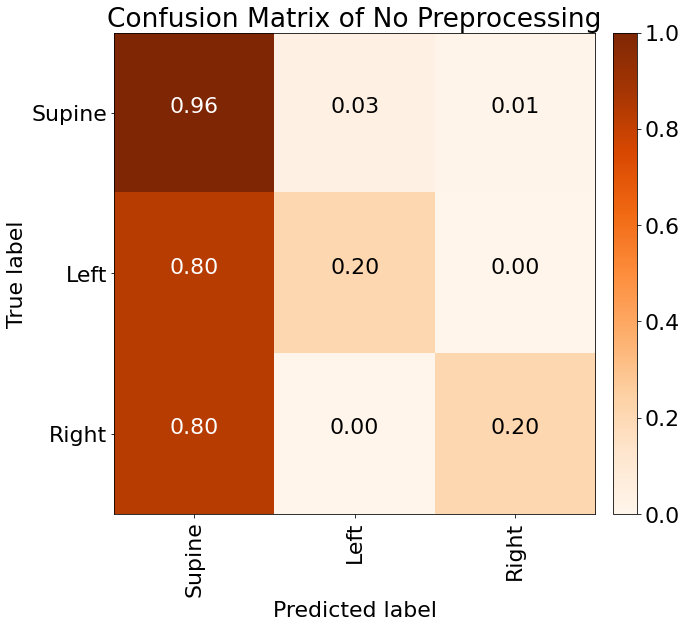

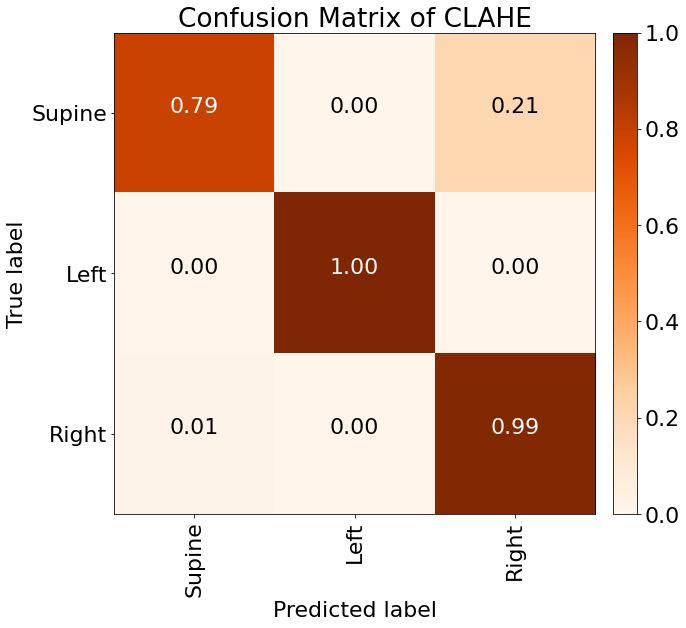

In [17]:
experiments = [no_preprocessing, clahe]

for experiment in experiments:
    experiment.run()